In [60]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [3]:
image_path = "eiffel1.jpg"
img = cv2.imread(image_path)

[[[ 22 143 214]
  [ 22 143 214]
  [ 21 142 213]
  ...
  [112 167 221]
  [112 167 221]
  [113 168 222]]

 [[ 22 143 214]
  [ 22 143 214]
  [ 21 142 213]
  ...
  [112 167 221]
  [112 167 221]
  [113 168 222]]

 [[ 24 142 214]
  [ 24 142 214]
  [ 24 142 214]
  ...
  [112 167 221]
  [112 167 221]
  [113 168 222]]

 ...

 [[157 138   0]
  [171 152  11]
  [180 161  20]
  ...
  [ 58  70   8]
  [ 54  64   3]
  [ 61  71  10]]

 [[221 196  78]
  [213 189  67]
  [219 195  69]
  ...
  [ 67  81  20]
  [ 69  83  22]
  [ 61  75  14]]

 [[230 203  96]
  [216 190  79]
  [200 175  56]
  ...
  [ 57  72  13]
  [ 56  71  12]
  [ 52  67   8]]]


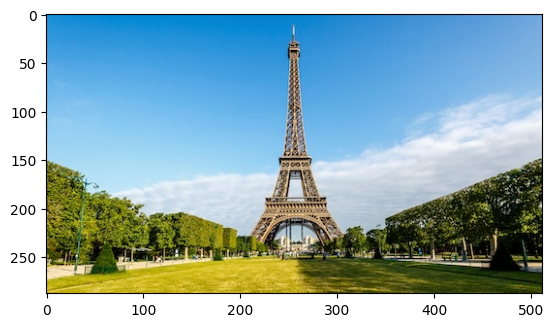

In [10]:
# colormap1=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(colormap1)
# print(colormap1)

In [27]:
print(type(img[0]))

<class 'numpy.ndarray'>


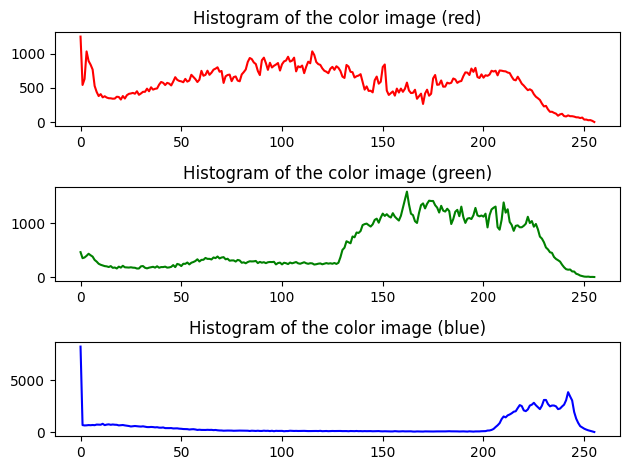

In [134]:
red_hist = cv2.calcHist([colormap1], [0], None, [256], [0, 255])
green_hist = cv2.calcHist([colormap1], [1], None, [256], [0, 255])
blue_hist = cv2.calcHist([colormap1], [2], None, [256], [0, 255])

plt.subplot(3, 1, 1)
plt.plot(red_hist, color='r')
# plt.xlim([0, 255])
plt.title('Histogram of the color image (red)')

plt.subplot(3, 1, 2)
plt.plot(green_hist, color='g')
#plt.xlim([0, 255])
plt.title('Histogram of the color image (green)')

plt.subplot(3, 1, 3)
plt.plot(blue_hist, color='b')
#plt.xlim([0, 255])
plt.title('Histogram of the color image (blue)')

plt.tight_layout()
plt.show()

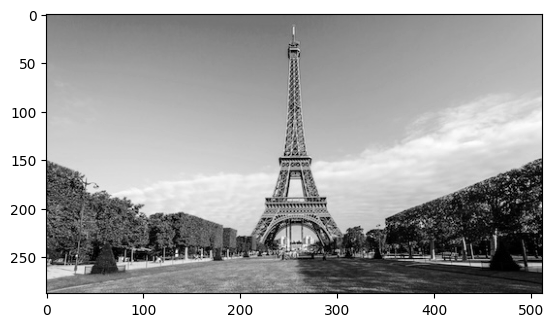

In [19]:
red = img[:,:,2]
green = img[:,:,1]
blue = img[:,:,0]
Average_Gray = blue/3+green/3+red/3
plt.imshow(Average_Gray, cmap='gray')

In [25]:
print(Average_Gray)
print(type(Average_Gray))
print(Average_Gray.shape)

[[126.33333333 126.33333333 125.33333333 ... 166.66666667 166.66666667
  167.66666667]
 [126.33333333 126.33333333 125.33333333 ... 166.66666667 166.66666667
  167.66666667]
 [126.66666667 126.66666667 126.66666667 ... 166.66666667 166.66666667
  167.66666667]
 ...
 [ 98.33333333 111.33333333 120.33333333 ...  45.33333333  40.33333333
   47.33333333]
 [165.         156.33333333 161.         ...  56.          58.
   50.        ]
 [176.33333333 161.66666667 143.66666667 ...  47.33333333  46.33333333
   42.33333333]]
<class 'numpy.ndarray'>
(288, 512)


Text(0, 0.5, 'Pixel count')

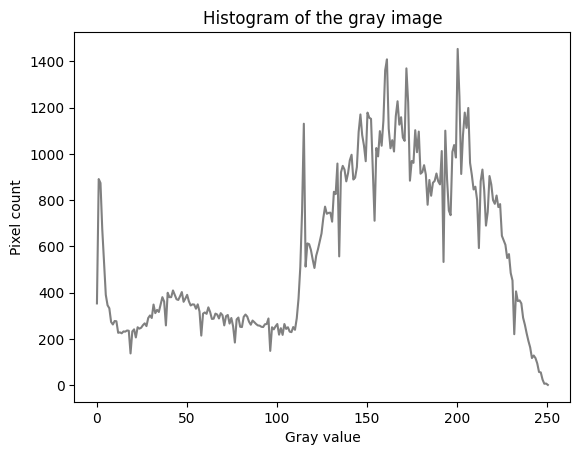

In [128]:
# gray_hist = cv2.calcHist([Average_Gray], [0], None, [256], [0, 255])
# plt.hist(Average_Gray)
# print(len(Average_Gray), len)
# plt.xlim([0, 255])
# plt.title('gray histogram')

# plt.tight_layout()
# plt.show()

# tuple to select colors of each channel line
colors = ("gray",)

# create the histogram plot, with three lines, one for each color
plt.figure()
#plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(Average_Gray[:, :], bins=256)
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Histogram of the gray image")
plt.xlabel("Gray value")
plt.ylabel("Pixel count")

288 <built-in function len>


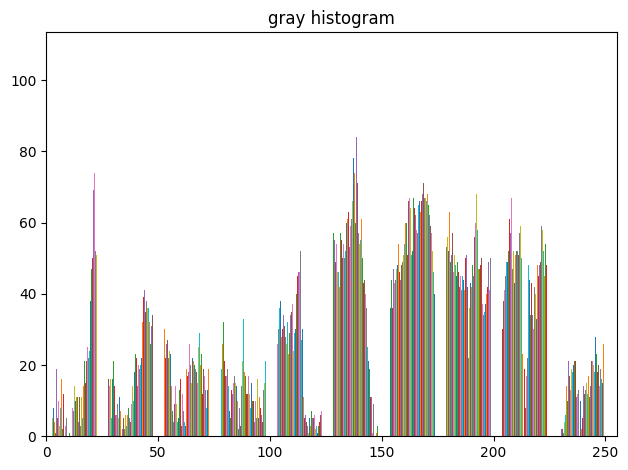

In [31]:
plt.hist(Average_Gray[:,:])
print(len(Average_Gray), len)
plt.xlim([0, 255])
plt.title('gray histogram')

plt.tight_layout()
plt.show()

In [33]:
print(Average_Gray[:, :])

[[126.33333333 126.33333333 125.33333333 ... 166.66666667 166.66666667
  167.66666667]
 [126.33333333 126.33333333 125.33333333 ... 166.66666667 166.66666667
  167.66666667]
 [126.66666667 126.66666667 126.66666667 ... 166.66666667 166.66666667
  167.66666667]
 ...
 [ 98.33333333 111.33333333 120.33333333 ...  45.33333333  40.33333333
   47.33333333]
 [165.         156.33333333 161.         ...  56.          58.
   50.        ]
 [176.33333333 161.66666667 143.66666667 ...  47.33333333  46.33333333
   42.33333333]]


In [38]:
minGrayLevel = Average_Gray.min()
maxGrayLevel = Average_Gray.max()
print(minGrayLevel, maxGrayLevel)

0.0 251.66666666666669


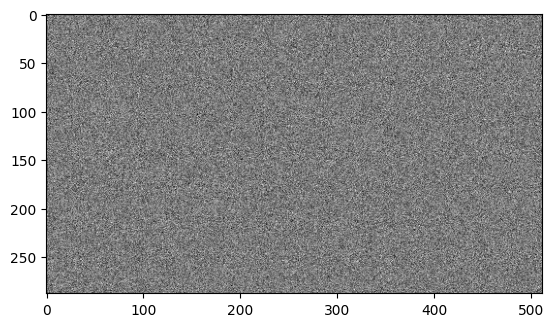

In [123]:
# For Gaussian
row,col= Average_Gray.shape
ch = 1
noise_mean = 0
noise_var = 1
noise_std = noise_var ** 0.5
gauss = np.random.normal(mean,noise_std,(row,col))
noise = gauss.reshape(row,col)
noisy_image = Average_Gray + noise

plt.imshow(noise, cmap='gray')

Text(0, 0.5, 'Pixel count')

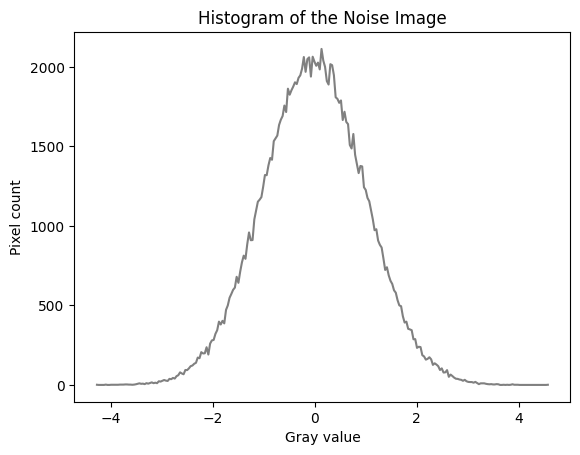

In [136]:
# tuple to select colors of each channel line
colors = ("gray",)

# create the histogram plot, with three lines, one for each color
plt.figure()
# plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(noise[:, :], bins=256)
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Histogram of the Noise Image")
plt.xlabel("Gray value")
plt.ylabel("Pixel count")

In [135]:
# get mean from image
# imean = np.mean(Average_Gray)
# print('image mean:', imean)

# # get variance from image
# # variance = mean of square of image - square of mean of image
# grayf = Average_Gray.astype(np.float32)
# grayf2 = grayf * grayf
# imeanf2 = np.mean(grayf2)
# ivar = imeanf2 - imean**2
# istd = math.sqrt(ivar)
# print('image variance and std:', ivar, istd)
# print()


# get mean from image
imean = np.mean(noise)
print('noisy mean:', format(imean, ".2f"))

# get variance from image
# variance = mean of square of image - square of mean of image
grayf = noise.astype(np.float32)
grayf2 = grayf * grayf
imeanf2 = np.mean(grayf2)
ivar = imeanf2 - imean**2
istd = math.sqrt(ivar)
print('noisy variance and std:', format(ivar, ".2f"), format(istd, ".2f"))

print('Expected mean:', noise_mean)
print('Expected std:', noise_std)



noisy mean: 0.00
noisy variance and std: 1.00 1.00
Expected mean: 0
Expected std: 1.0


In [113]:
# 7. Compute the autocorrelation of the noise image. Deduced the theoretical result.
autocorr_noise = np.correlate(noise.flatten(), noise.flatten(), mode='full') 
theoretical_autocorr = istd ** 2 * np.ones_like(autocorr_noise)

print("The autocorrelation is ",autocorr_noise) 
print("The theoratical autocorrelation is ",theoretical_autocorr)

The autocorrelation is  [-0.34459143  0.26519005  0.51272831 ...  0.51272831  0.26519005
 -0.34459143]
The theoratical autocorrelation is  [1.00129748 1.00129748 1.00129748 ... 1.00129748 1.00129748 1.00129748]


In [114]:
from scipy import signal
cor = signal.correlate2d(noise, noise)


294911 294911


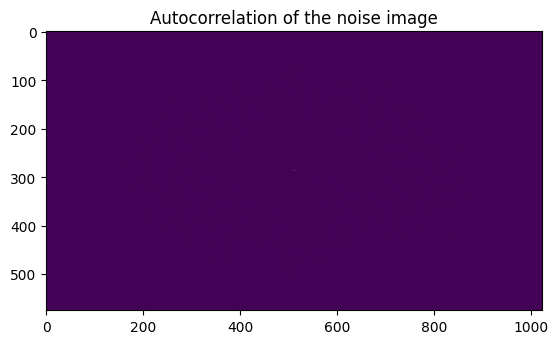

In [157]:
plt.title("Autocorrelation of the noise image")
plt.imshow(cor)

In [166]:
# Image Range
ImageRange = maxGrayLevel - minGrayLevel
print("Image Range: ", ImageRange)

snr = (ImageRange) / istd
print("SNR:", snr)

snr_dB = 20 * np.log10(snr)
print("SNR (in db):", snr_dB)

Image Range:  251.66666666666669
SNR: 251.5248930568722
SNR (in db): 48.01161946038359


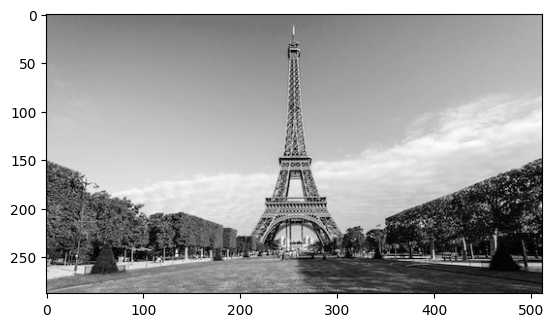

In [138]:
noisy_image = Average_Gray + noise

plt.imshow(noisy_image, cmap='gray')

Text(0, 0.5, 'Pixel count')

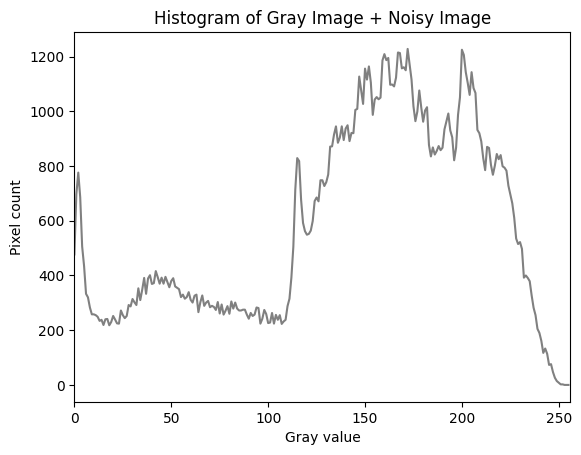

In [140]:
# tuple to select colors of each channel line
colors = ("gray",)

# create the histogram plot, with three lines, one for each color
plt.figure()
plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(noisy_image[:, :], bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Histogram of Gray Image + Noisy Image")
plt.xlabel("Gray value")
plt.ylabel("Pixel count")

4.193278622673718
12.45107440175403


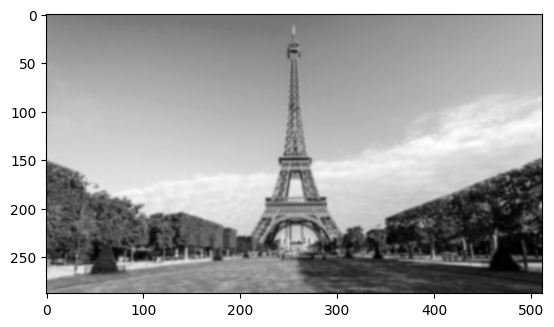

In [159]:
# Apply a smoothing filter (e.g., Gaussian blur)
smoothed_info_image = cv2.GaussianBlur(Average_Gray, (5, 5), 0)
smoothed_noisy_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)


plt.imshow(smoothed_info_image, cmap='gray')
plt.imshow(smoothed_noisy_image, cmap='gray')


# Compute new SNR
snr_after_smoothing = (np.max(smoothed_info_image) - np.min(smoothed_info_image)) / np.std(smoothed_noisy_image)
snr_dB_after_smoothing = 20 * np.log10(snr_after_smoothing)

print(snr_after_smoothing)
print(snr_dB_after_smoothing)

[12.499915980630528, 12.535234862185796, 12.581908376607148, 12.617208702621973]


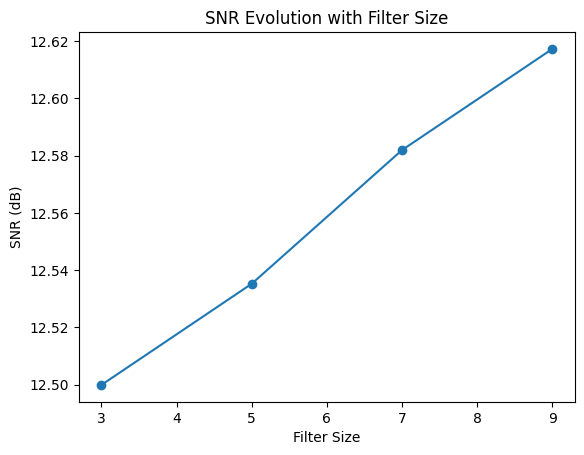

In [155]:
# Create a function for SNR computation based on filter size and shape
def compute_snr_with_filter(image, noisy_image, filter_size):
    smoothed_noisy_image = cv2.GaussianBlur(noisy_image, (filter_size, filter_size), 0)
    snr = (np.max(image) - np.min(image)) / np.std(smoothed_noisy_image)
    return 20 * np.log10(snr)

# Study the evolution of SNR with filter size and/or shape
filter_sizes = [3, 5, 7, 9]
snr_values = []

for size in filter_sizes:
    snr_values.append(compute_snr_with_filter(smoothed_info_image, smoothed_noisy_image, size))
print(snr_values)

# Plot the results
plt.figure(4)
plt.plot(filter_sizes, snr_values, marker='o')
plt.title('SNR Evolution with Filter Size')
plt.xlabel('Filter Size')
plt.ylabel('SNR (dB)')
plt.show()

In [143]:
# 7. Compute the autocorrelation of the noise image. Deduced the theoretical result.
autocorr_noise = np.correlate(noise.flatten(), Average_Gray.flatten(), mode='full') 
theoretical_autocorr = istd ** 2 * np.ones_like(autocorr_noise)

print("The autocorrelation is ",autocorr_noise) 
print("The theoratical autocorrelation is ",theoretical_autocorr)

The autocorrelation is  [  -8.01095532   47.60626787   82.17664293 ... -106.11679541    3.56219464
  -63.95449268]
The theoratical autocorrelation is  [1.00112763 1.00112763 1.00112763 ... 1.00112763 1.00112763 1.00112763]


In [147]:
print(len(cor), len(cor[0]))

575 1023


In [152]:
print(len(cor), len(cor[0]))

575 1023


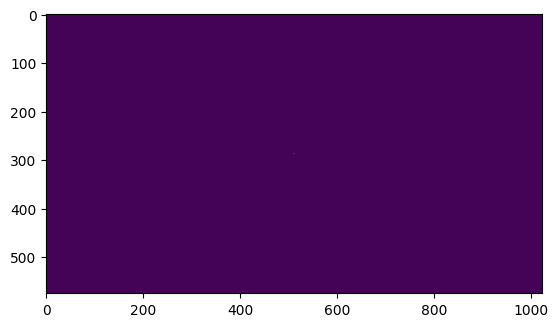

In [153]:
plt.imshow(cor)